# 금융 통계학 기본(4) - 상관 분석, 회귀분석


<img width="320" src="http://goo.gl/Hphovm">

#### 2017 FinanceData http://fb.com/financedata

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 8
plt.rcParams["figure.figsize"] = (14,4)

# 상관분석 
Correlation Analysis: 두 변수간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
* 공분산 covariance : (음수, 0, 양수)
* 상관계수 correlation coefficient : (-1 ~ 1 사이의 값)
* 베타 beta: (몇 배인지 표현)

(데이터 집합 A와 B에 대해)
* 공분산: (음수, 0, 양수)
 * 양수면 A가 커짐에 따라 B도 커진다는 것을 의미
 *  (음수, 0, 양수인지만 중요, 값의 크기는 중요하지 않음)
* 상관계수: (-1 ~ 1 사이의 값)
 *  양수면 양의 상관관계, 음수면 음의 상관관계
* 베타: (몇 배인지 표현)
 *  A값이 움직일 때, B값이 얼마나(몇 배) 움직이는지를 표현
 *  시장베타: 종목의 가격이 시장 KOSPI 200 의 변화에 얼마나 영향을 받는지

# 엑셀 상관분석

<img width="480" src="http://i.imgur.com/PVDIxKW.png">


<img width="480" src="http://i.imgur.com/OWL17JW.png">


 | 코스피 | 삼성전자 | LG화학 | KB금융그룹
-- | --         | --             | --          | -- 
코스피 |  1 | | |
삼성전자 | 0.183037839 | 1 | |
LG화학 | 0.595013318 | 0.39341706 | 1 |
KB금융그룹 | 0.192568512 | -0.54769734 | -0.30281811 | 1


# 코스피 시가총액 상위
* 한국거래소 홈페이지 데이터
* https://goo.gl/vzqzun "코스피 시총 상위 (2015-06-30)"

순위 | 종목코드 | 종목명
-- | -- | --
1  | 005930 | 삼성전자
2  | 000660  | SK하이닉스
3  | 005380  | 현대차
4  | 015760  | 한국전력
5  | 090430  | 아모레퍼시픽
6  | 028260  | 제일모직
7  | 005935  | 삼성전자우
8  | 032830  | 삼성생명
9  | 035420  | NAVER
10  | 012330  | 현대모비스

In [2]:
tickers = {
 'KRX:KOSPI': '코스피',
 'KRX:005930': '삼성전자',
 'KRX:000660': 'SK하이닉스',
 'KRX:005380': '현대차',
 'KRX:015760': '한국전력',
 'KRX:090430': '아모레퍼시픽',
 'KRX:028260': '제일모직',
 'KRX:005935': '삼성전자우',
 'KRX:032830': '삼성생명',
 'KRX:035420': 'NAVER',
 'KRX:012330': '현대모비스',
}

In [3]:
list(tickers.keys())

['KRX:012330',
 'KRX:000660',
 'KRX:005380',
 'KRX:035420',
 'KRX:090430',
 'KRX:KOSPI',
 'KRX:015760',
 'KRX:005935',
 'KRX:032830',
 'KRX:005930',
 'KRX:028260']

# 종목별 가격 데이터 읽기
* get_data_google(tickers_list, '2016-01-01', '2016-12-31')
* tickers_google: 다수의 심볼(티커)을 지정할 수 있다
* 다수의 종목을 지정하면 Panel(3차원 자료구조)이 반환.

In [4]:
from pandas_datareader import data

p = data.get_data_google(list(tickers.keys()), '2016-01-01', '2016-12-31')
p

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 246 (major_axis) x 11 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2016-01-04 00:00:00 to 2016-12-29 00:00:00
Minor_axis axis: KRX:000660 to KRX:KOSPI

Dimensions: 6 (items) x 261 (major_axis) x 11 (minor_axis)
* 5개 항목(Open, Close, Hign, Low, Volume)
* 246: 날짜수
* 11: 종목수(10개 종목 + KOSPI)

In [5]:
df = p['Close']
df.head()

,KRX:000660,KRX:005380,KRX:005930,KRX:005935,KRX:012330,KRX:015760,KRX:028260,KRX:032830,KRX:035420,KRX:090430,KRX:KOSPI
Date,,,,,,,,,,,
2016-01-04,30150.0,144000.0,1205000.0,1036000.0,238000.0,50000.0,140000.0,106500.0,632000.0,412500.0,1918.76
2016-01-05,30600.0,143500.0,1208000.0,1042000.0,237000.0,50700.0,140000.0,107500.0,637000.0,410500.0,1930.53
2016-01-06,30750.0,140000.0,1175000.0,1032000.0,234500.0,50800.0,144000.0,104000.0,623000.0,417000.0,1925.43
2016-01-07,30200.0,137500.0,1163000.0,1006000.0,237000.0,50300.0,143000.0,102500.0,652000.0,410000.0,1904.33
2016-01-08,29700.0,136500.0,1171000.0,1014000.0,238500.0,49900.0,142000.0,105000.0,652000.0,413000.0,1917.62


# 컬럼 이름 바꾸기

In [6]:
df = df.rename(columns=tickers)
df.head()

,SK하이닉스,현대차,삼성전자,삼성전자우,현대모비스,한국전력,제일모직,삼성생명,NAVER,아모레퍼시픽,코스피
Date,,,,,,,,,,,
2016-01-04,30150.0,144000.0,1205000.0,1036000.0,238000.0,50000.0,140000.0,106500.0,632000.0,412500.0,1918.76
2016-01-05,30600.0,143500.0,1208000.0,1042000.0,237000.0,50700.0,140000.0,107500.0,637000.0,410500.0,1930.53
2016-01-06,30750.0,140000.0,1175000.0,1032000.0,234500.0,50800.0,144000.0,104000.0,623000.0,417000.0,1925.43
2016-01-07,30200.0,137500.0,1163000.0,1006000.0,237000.0,50300.0,143000.0,102500.0,652000.0,410000.0,1904.33
2016-01-08,29700.0,136500.0,1171000.0,1014000.0,238500.0,49900.0,142000.0,105000.0,652000.0,413000.0,1917.62


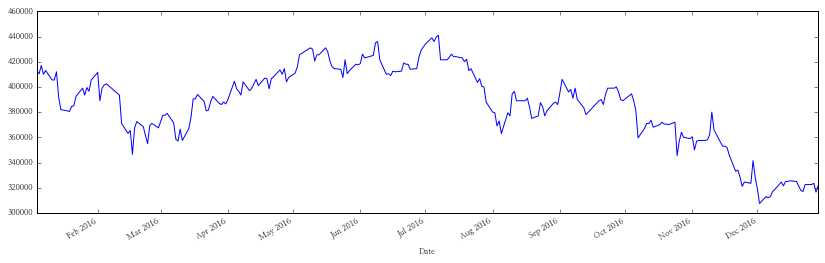

In [7]:
df['아모레퍼시픽'].plot()

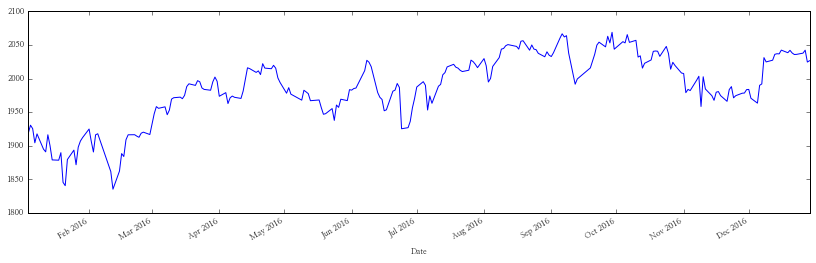

In [8]:
df['코스피'].plot()

# (전일 대비) 등락률 
* df_pct_chg = df.pct_change()
* df_log_ret = np.log(df) - np.log(df.shift(1))

In [9]:
changes = df.pct_change()
changes.head()

,SK하이닉스,현대차,삼성전자,삼성전자우,현대모비스,한국전력,제일모직,삼성생명,NAVER,아모레퍼시픽,코스피
Date,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.014925,-0.003472,0.002490,0.005792,-0.004202,0.014000,0.000000,0.009390,0.007911,-0.004848,0.006134
2016-01-06,0.004902,-0.024390,-0.027318,-0.009597,-0.010549,0.001972,0.028571,-0.032558,-0.021978,0.015834,-0.002642
2016-01-07,-0.017886,-0.017857,-0.010213,-0.025194,0.010661,-0.009843,-0.006944,-0.014423,0.046549,-0.016787,-0.010959
2016-01-08,-0.016556,-0.007273,0.006879,0.007952,0.006329,-0.007952,-0.006993,0.024390,0.000000,0.007317,0.006979


In [10]:
import numpy as np

df_log_ret = np.log(df) - np.log(df.shift(1))
df_log_ret.head()

,SK하이닉스,현대차,삼성전자,삼성전자우,현대모비스,한국전력,제일모직,삼성생명,NAVER,아모레퍼시픽,코스피
Date,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.014815,-0.003478,0.002487,0.005775,-0.004211,0.013903,0.000000,0.009346,0.007880,-0.004860,0.006115
2016-01-06,0.004890,-0.024693,-0.027698,-0.009643,-0.010605,0.001970,0.028171,-0.033100,-0.022223,0.015710,-0.002645
2016-01-07,-0.018048,-0.018019,-0.010265,-0.025517,0.010605,-0.009891,-0.006969,-0.014528,0.045498,-0.016929,-0.011019
2016-01-08,-0.016695,-0.007299,0.006855,0.007921,0.006309,-0.007984,-0.007018,0.024098,0.000000,0.007290,0.006955


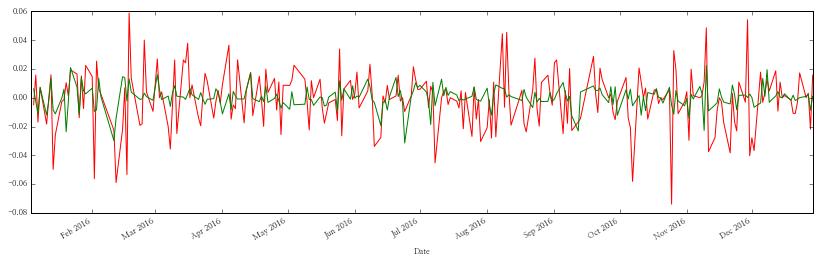

In [11]:
df_log_ret['아모레퍼시픽'].plot(color='r')
df_log_ret['코스피'].plot(color='g')
plt.show()

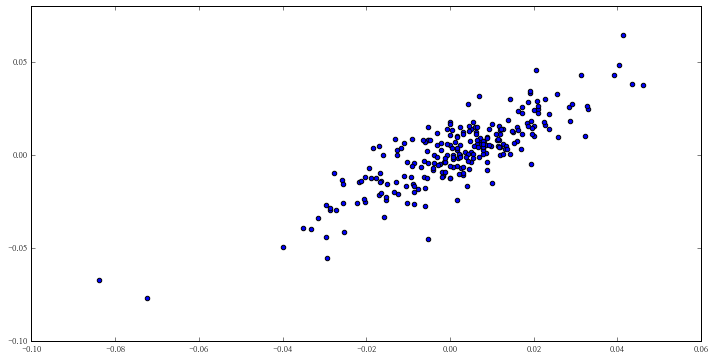

In [12]:
x = df_log_ret['삼성전자']
y = df_log_ret['삼성전자우']

plt.figure(figsize=(12,6))
plt.scatter(x, y)

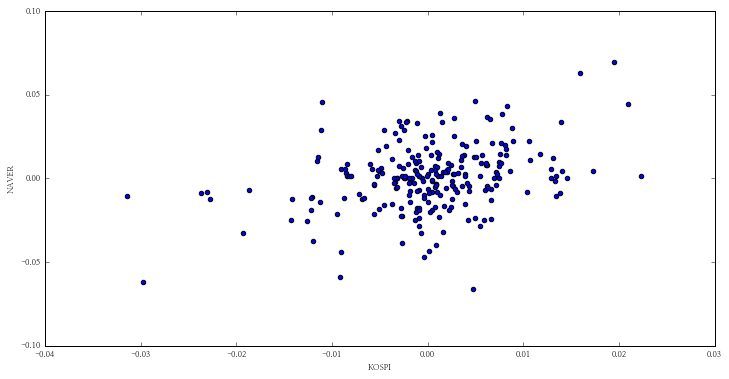

In [13]:
plt.figure(figsize=(12,6))
plt.xlabel('KOSPI')
plt.ylabel('NAVER')

x = df_log_ret['코스피']
y = df_log_ret['NAVER']
                                                
plt.scatter(x, y)

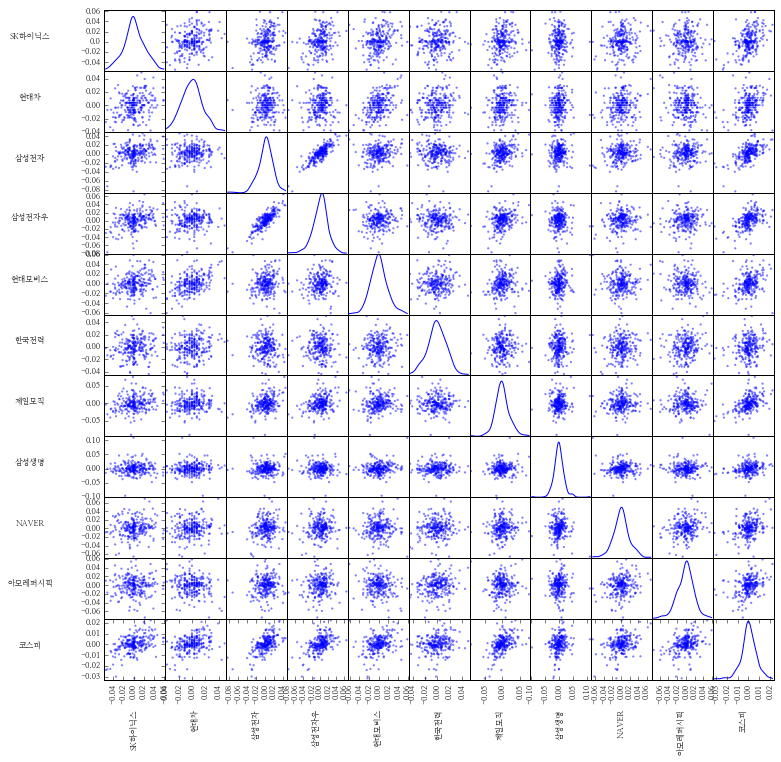

In [14]:
from pandas.plotting import scatter_matrix

axs = scatter_matrix(df_log_ret, diagonal='kde', figsize=(12, 12))
n = len(df_log_ret.columns)

for x in range(n):
    for y in range(n):
        ax = axs[x, y]
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.labelpad = 50
        
plt.show()

# 상위 10개 종목 상관관계

In [15]:
corr = changes.corr()
corr

,SK하이닉스,현대차,삼성전자,삼성전자우,현대모비스,한국전력,제일모직,삼성생명,NAVER,아모레퍼시픽,코스피
SK하이닉스,1.000000,0.273457,0.299790,0.313014,0.214492,0.119388,0.201162,0.019676,0.105597,0.005420,0.456877
현대차,0.273457,1.000000,0.069951,0.049650,0.448375,0.145139,0.081807,0.053593,0.115701,-0.179750,0.325167
삼성전자,0.299790,0.069951,1.000000,0.844176,0.142212,-0.068344,0.345724,0.026885,0.172437,0.083760,0.601479
삼성전자우,0.313014,0.049650,0.844176,1.000000,0.085759,-0.049055,0.321167,-0.048757,0.101413,0.085058,0.515706
현대모비스,0.214492,0.448375,0.142212,0.085759,1.000000,0.074453,0.099434,0.155276,0.029904,-0.142760,0.305897
한국전력,0.119388,0.145139,-0.068344,-0.049055,0.074453,1.000000,0.015371,0.061521,0.108541,0.164276,0.177083
제일모직,0.201162,0.081807,0.345724,0.321167,0.099434,0.015371,1.000000,0.078510,0.084359,0.018527,0.485103
삼성생명,0.019676,0.053593,0.026885,-0.048757,0.155276,0.061521,0.078510,1.000000,-0.038508,-0.010645,0.227190
NAVER,0.105597,0.115701,0.172437,0.101413,0.029904,0.108541,0.084359,-0.038508,1.000000,0.197887,0.335976
아모레퍼시픽,0.005420,-0.179750,0.083760,0.085058,-0.142760,0.164276,0.018527,-0.010645,0.197887,1.000000,0.353727


# 상위 10개 종목 상관관계 히트맵

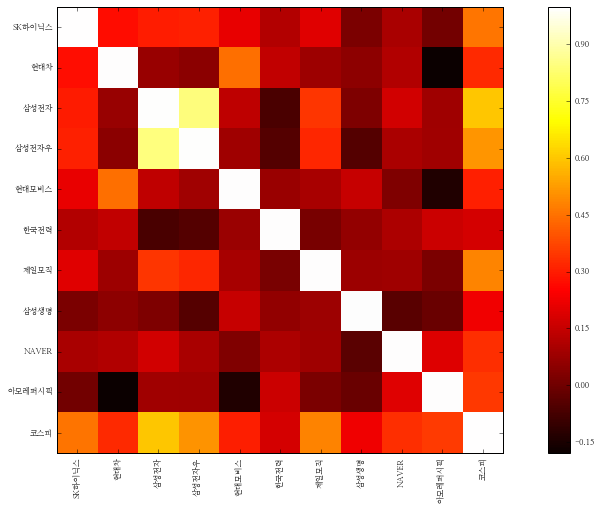

In [16]:
corr = changes.corr()
plt.figure(figsize=(16,8))
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

# 상관계수 순위 만들기

In [17]:
import pandas as pd

idx = []; vals = []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:10]

(삼성전자, 삼성전자우)    0.844176
(삼성전자, 코스피)      0.601479
(삼성전자우, 코스피)     0.515706
(제일모직, 코스피)      0.485103
(SK하이닉스, 코스피)    0.456877
(현대차, 현대모비스)     0.448375
(아모레퍼시픽, 코스피)    0.353727
(삼성전자, 제일모직)     0.345724
(NAVER, 코스피)     0.335976
(현대차, 코스피)       0.325167
dtype: float64

# 종목간 상관계수

In [40]:
code_names = {
    'KRX:KOSPI':'KOSPI',
    'KRX:005930':'삼성전자', 
    'KRX:005380':'현대차',
    'KRX:035420':'네이버', 
    'KRX:006280':'녹십자', 
    'KRX:012750':'에스원',
    'KRX:003490':'대한항공',
    'KRX:000210':'대림산업',
    'KRX:004990':'롯데제과',
    'KRX:192400':'쿠쿠전자',
    'KRX:007310':'오뚜기' 
}

df = data.get_data_google(list(code_names.keys()), '2016-01-01', '2016-12-31')
df = df['Close']
df = df.rename(columns=code_names)
chg = df.pct_change()
chg_corr = chg.corr()
chg_corr

,대림산업,대한항공,롯데제과,현대차,삼성전자,녹십자,오뚜기,에스원,네이버,쿠쿠전자,KOSPI
대림산업,1.000000,0.260072,0.264517,0.253513,0.133707,0.173793,0.121822,0.049344,0.061756,0.211151,0.543794
대한항공,0.260072,1.000000,0.135934,0.077577,0.089962,0.132439,0.157276,0.078532,0.142608,0.230366,0.359939
롯데제과,0.264517,0.135934,1.000000,0.157689,0.061947,0.121988,0.281335,0.112643,0.095061,0.134528,0.344260
현대차,0.253513,0.077577,0.157689,1.000000,0.069951,-0.062322,-0.113355,-0.011356,0.115701,0.009042,0.325167
삼성전자,0.133707,0.089962,0.061947,0.069951,1.000000,0.082019,0.079016,0.035617,0.172437,0.026118,0.601479
녹십자,0.173793,0.132439,0.121988,-0.062322,0.082019,1.000000,0.297880,0.138114,0.144430,0.328695,0.400891
오뚜기,0.121822,0.157276,0.281335,-0.113355,0.079016,0.297880,1.000000,0.164441,0.132999,0.279965,0.270173
에스원,0.049344,0.078532,0.112643,-0.011356,0.035617,0.138114,0.164441,1.000000,0.108220,0.028759,0.157832
네이버,0.061756,0.142608,0.095061,0.115701,0.172437,0.144430,0.132999,0.108220,1.000000,0.159399,0.335976
쿠쿠전자,0.211151,0.230366,0.134528,0.009042,0.026118,0.328695,0.279965,0.028759,0.159399,1.000000,0.338550


# 종목간 상관계수 소트

In [19]:
ser = chg_corr['KOSPI']
ser_ord = ser.sort_values(ascending=False)
ser_ord[1:]

삼성전자    0.601479
대림산업    0.543794
녹십자     0.400891
대한항공    0.359939
롯데제과    0.344260
쿠쿠전자    0.338550
네이버     0.335976
현대차     0.325167
오뚜기     0.270173
에스원     0.157832
Name: KOSPI, dtype: float64

# KOSPI 와 다른 종목간 상관계수
상관계수를 크기순으로 정렬하기(TOP-N 구하기)

In [20]:
ser = chg_corr['KOSPI']
ser_ord = ser.sort_values(ascending=False)
ser_ord[1:]

삼성전자    0.601479
대림산업    0.543794
녹십자     0.400891
대한항공    0.359939
롯데제과    0.344260
쿠쿠전자    0.338550
네이버     0.335976
현대차     0.325167
오뚜기     0.270173
에스원     0.157832
Name: KOSPI, dtype: float64

# 수익과 위험
* 수익 (returns): 수익률 평균 (mean)
* 위험 (risk): 표준편차 (std), 값이 클수록 변동성이 크므로 위험이 크다

In [21]:
ticker_names = {
    'KRX:KOSPI':'KOSPI',
    'KRX:005930':'삼성전자',
    'KRX:005380':'현대차',
    'KRX:012330':'현대모비스', 
    'KRX:005490':'포스코',
    'KRX:000660':'SK하이닉스',
    'KRX:035420':'Naver',
    'KRX:005935':'삼성전자우', 
    'KRX:000270':'기아자동차',
    'KRX:015760':'한국전력',
    'KRX:090430':'아모레퍼시픽',
    'KRX:032830':'삼성생명',
    'KRX:006280':'녹십자',
    'KRX:012750':'에스원',
    'KRX:003490':'대한항공',
    'KRX:000210':'대림산업',
    'KRX:004990':'롯데제과',
    'KRX:007310':'오뚜기',
}

tickers = list(ticker_names.keys())
p = data.get_data_google(tickers, start='2016-01-01', end='2016-12-31')
df = p['Close']
df = df.rename(columns=ticker_names)
df.head()

,대림산업,기아자동차,SK하이닉스,대한항공,롯데제과,현대차,포스코,삼성전자,삼성전자우,녹십자,오뚜기,현대모비스,에스원,한국전력,삼성생명,Naver,아모레퍼시픽,KOSPI
Date,,,,,,,,,,,,,,,,,,
2016-01-04,64400.0,50800.0,30150.0,27000.0,228600.0,144000.0,164000.0,1205000.0,1036000.0,186500.0,1255000.0,238000.0,100000.0,50000.0,106500.0,632000.0,412500.0,1918.76
2016-01-05,65000.0,50700.0,30600.0,26550.0,226700.0,143500.0,169000.0,1208000.0,1042000.0,194500.0,1255000.0,237000.0,98700.0,50700.0,107500.0,637000.0,410500.0,1930.53
2016-01-06,65700.0,49400.0,30750.0,26350.0,227700.0,140000.0,168500.0,1175000.0,1032000.0,223500.0,1273000.0,234500.0,103500.0,50800.0,104000.0,623000.0,417000.0,1925.43
2016-01-07,63800.0,49300.0,30200.0,26250.0,227600.0,137500.0,164000.0,1163000.0,1006000.0,226500.0,1294000.0,237000.0,101500.0,50300.0,102500.0,652000.0,410000.0,1904.33
2016-01-08,63300.0,48500.0,29700.0,25650.0,225100.0,136500.0,165000.0,1171000.0,1014000.0,249500.0,1295000.0,238500.0,103000.0,49900.0,105000.0,652000.0,413000.0,1917.62


In [22]:
changes = df.pct_change()
changes.head()

,대림산업,기아자동차,SK하이닉스,대한항공,롯데제과,현대차,포스코,삼성전자,삼성전자우,녹십자,오뚜기,현대모비스,에스원,한국전력,삼성생명,Naver,아모레퍼시픽,KOSPI
Date,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.009317,-0.001969,0.014925,-0.016667,-0.008311,-0.003472,0.030488,0.002490,0.005792,0.042895,0.000000,-0.004202,-0.013000,0.014000,0.009390,0.007911,-0.004848,0.006134
2016-01-06,0.010769,-0.025641,0.004902,-0.007533,0.004411,-0.024390,-0.002959,-0.027318,-0.009597,0.149100,0.014343,-0.010549,0.048632,0.001972,-0.032558,-0.021978,0.015834,-0.002642
2016-01-07,-0.028919,-0.002024,-0.017886,-0.003795,-0.000439,-0.017857,-0.026706,-0.010213,-0.025194,0.013423,0.016496,0.010661,-0.019324,-0.009843,-0.014423,0.046549,-0.016787,-0.010959
2016-01-08,-0.007837,-0.016227,-0.016556,-0.022857,-0.010984,-0.007273,0.006098,0.006879,0.007952,0.101545,0.000773,0.006329,0.014778,-0.007952,0.024390,0.000000,0.007317,0.006979


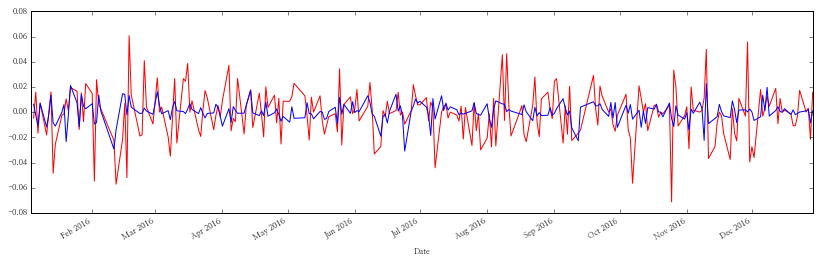

In [23]:
changes['아모레퍼시픽'].plot(color='r')
changes['KOSPI'].plot(color='b')

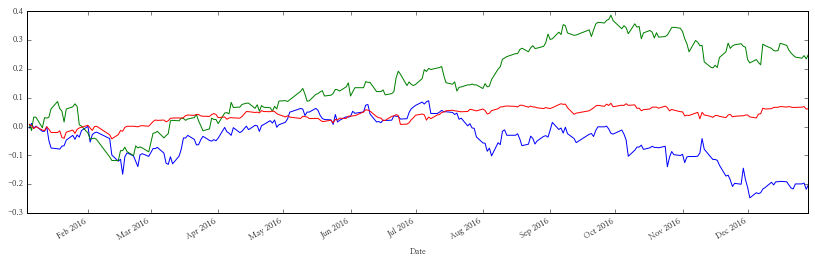

In [24]:
changes['아모레퍼시픽'].cumsum().plot(color='b')
changes['Naver'].cumsum().plot(color='g')
changes['KOSPI'].cumsum().plot(color='r')

# 스캐터 차트, 수익과 위험 분석
scatter 차트로 수익과 위험의 상대적인 비교를 쉽게 할 수 있다.
* 수익 (returns): 수익률 평균 (mean)
* 위험 (risk): 표준편차 (std)


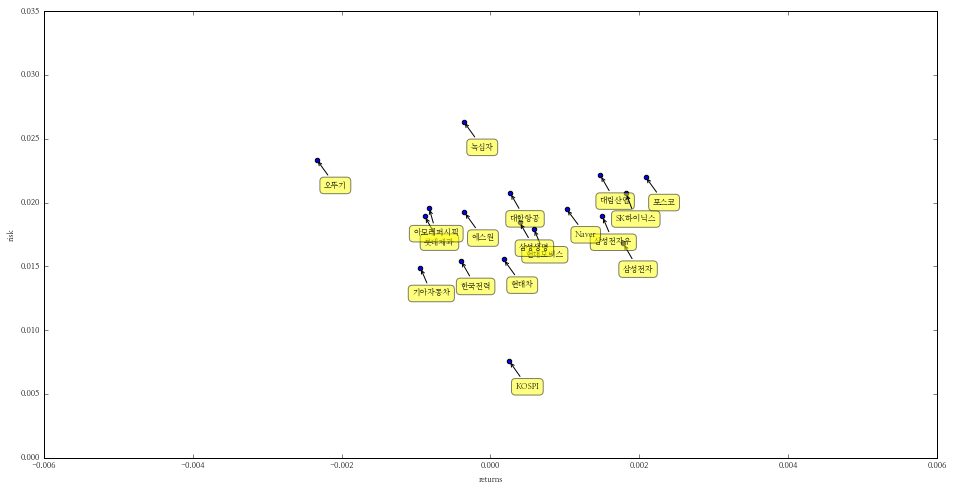

In [25]:
tickers = list(ticker_names.keys())
p = data.get_data_google(tickers, start='2016-01-01', end='2016-12-31')
df = p['Close']
df = df.rename(columns=ticker_names)

changes = df.pct_change()

plt.figure(figsize=(16,8))
plt.scatter(changes.mean(), changes.std())
plt.xlabel('returns')
plt.ylabel('risk')
for label, x, y in zip(changes.columns, changes.mean(), changes.std()):
    plt.annotate( label, xy=(x, y), xytext=(30, -30),
    textcoords = 'offset points',
    ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))    

# 지수와 상관관계

In [26]:
ticker_names = {
 'KRX:KOSPI':'KOSPI',
 'KRX:005930':'삼성전자',
 'KRX:005380':'현대차',
}

tickerts = list(ticker_names.keys())

p = data.get_data_google(tickerts, start='2016-01-01', end='2016-12-31')
#mask = p['Volume']['^KS11'] > 0
df = p['Close']
df = df.rename(columns=code_names)
chg = df.pct_change()
chg_corr = chg.corr()

chg_corr

,현대차,삼성전자,KOSPI
현대차,1.000000,0.069951,0.325167
삼성전자,0.069951,1.000000,0.601479
KOSPI,0.325167,0.601479,1.000000


# 회귀분석 Regression analysis
주어진 데이터를 가장 잘 나타낼 수 있는 수식 (직선)을 찾아내는 방법
* A가 커짐에 따라 B는 얼마나 커지는가?
* 공분산과 상관계수는 같이 움직일 확률의 정도를 알 수 있다.
* A가 1만큼 움직일 때, B가 얼마나 움직일지는 알기위해 사용하는 것이 회귀분석
* X값이 움직일 때 Y값이 얼마나(몇 배) 움직이는지 표현하는 것이 베타($\beta$)


# 보편적 회귀법칙 (law of universal regression)
* 영국 유전학자 프랜시스 골턴 (F. Galton, 1822 ~ 1891), 찰스 다윈의 사촌
* [Family Likeness in Stature] (1886)
* 일반적으로 키가 큰 부모에게서 키 큰 자녀가, 키가 작은 부모에게서 키 작은 자녀가 태어난다.
* 그러나, 키가 크던 작던 자녀들의 평균 키는 전체 평균 키 수준에 접근하는 현상
* 자녀들의 평균 키는 전체 인구의 평균 키로 회귀(regression)하는 경향이 있다.

# 단순회귀분석 (Simple Linear Regression)
* https://en.wikipedia.org/wiki/Simple_linear_regression
* 정의: 회귀분석이란 주어진 데이터를 가장 잘 나타낼 수 있는 수식을 찾아내는 방법

### 기울기
$$ b = \frac {\sum{(x - \bar x})(y - \bar y) }{ \sum{(x - \bar x)^2}} $$

### 절편
$$ a = \bar y - b \cdot \bar x $$

### 선형식
$$ y = a + b \cdot x $$

In [27]:
x = np.array([65, 68, 70, 71, 78])
y = np.array([165, 167, 170, 178, 183])

dff_x = x - x.mean()
dff_y = y - y.mean()

b = np.sum(dff_x * dff_y) / np.sum(dff_x ** 2)
a =  y.mean() - b * x.mean()

print ("b = %.2f, a = %.2f" % (b, a))

b = 1.48, a = 68.51


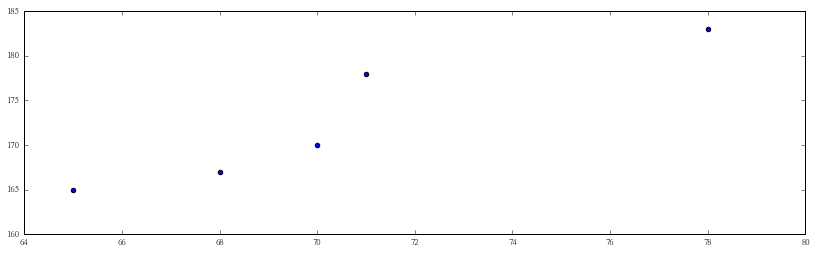

In [28]:
plt.scatter(x,y)

# 엑셀 회귀분석
데이터 분석 도구, '회귀분석'

<img src="http://i.imgur.com/u2TRwhU.png">

차트의 분산형을 추가

<img src="http://i.imgur.com/PkV7T8v.png">



# 추세선 trend line

### 추세선
* 기울기와 절편으로 표현

### 결정계수(coefficient of determination) 
* R^2 회귀식의 예측도(얼마나 믿을만 한지)를 표현
* $0 <= R^2 <= 1$


$$ y = 334.54x + 608973, R^2 = 0.034 $$
<img src="http://i.imgur.com/3UhrMSa.png">


$$ y = 421.12x - 588542, R^2 = 0.0354 $$
<img src="http://i.imgur.com/URU7XpJ.png">



# 베타계수 (beta coefficient)

* 베타: 증권시장 전체의 변동에 대한 개별자산의 수익률의 민감도(sensitivity)
* 예) 시장 수익률이 1% 증가하거나 감소할 때 주식 A의 수익률은 2% 증가하거나 감소한다면 주식 A의 베타계수는 2
* 예) 주식의 베타가 1이면, 이 주식의 수익률 변동은 시장과 동일, 1보다 크면 시장수익 변동폭보다 크다

# 종목 베타
아래 회귀식에서 $\beta$ (베타)가 바로 직선의 기울기

$$ y = \alpha + \beta x $$

종목A와 시장 M이 있을때,

$$ 종목A의 베타 = 공분산(종목A, 시장M) / 분산(M) $$

# 종목 베타의 계산(파이썬)
### 선형식 Liner expression
$$ y = \alpha + \beta x $$


beta, alpha 구하기
```python
beta = df['KOSPI'].cov(df['Samsung']) / df['KOSPI'].var()
alpha = df['Samsung'].mean() - beta * df['KOSPI'].mean()
```

# 종목 베타의 계산(스프레드시트)

A의 베타 = COVARIANCE.P(시장M, 종목A) / VAR.P(시장M)

```
=COVARIANCE.P(시장M, 종목A)/VAR.P(시장M)
=SLOPE(시장M, 종목A) 
```

# 엑셀 문서

https://drive.google.com/open?id=0B2Op0f7i-jUEVVpxY2lmc1FyZTQ

<img src="http://i.imgur.com/Ax8W3hu.png" >

# 구글 스프레드 시트와 CSV

### 구글 스프레드 시트 공유 URL

```
https://docs.google.com/spreadsheets/d/1svMckHOa6KqRgTe8gcy8JgP7dMu90Go7D65iZSvX7xU/edit?usp=sharing
```

### 스프레드 시트의 CSV URL

```python
docs_key = "1svMckHOa6KqRgTe8gcy8JgP7dMu90Go7D65iZSvX7xU"
url = "https://docs.google.com/feeds/download/spreadsheets/Export?key=%s&exportFormat=csv" % docs_key
```

In [37]:
docs_key = "1svMckHOa6KqRgTe8gcy8JgP7dMu90Go7D65iZSvX7xU"
url = "https://docs.google.com/feeds/download/spreadsheets/Export?key=%s&exportFormat=csv" % docs_key

df_docs = pd.read_csv(url, index_col=['날짜'], parse_dates=True)
df_docs.head()

,코스피,삼성전자,LG화학,KB금융그룹
날짜,,,,
2014-01-02,"1,967.19","1,288,624.27","285,703.50","41,253.66"
2014-01-03,"1,946.14","1,275,826.63","279,832.88","39,881.80"
2014-01-06,"1,953.28","1,286,655.41","278,365.23","39,440.85"
2014-01-07,"1,959.44","1,283,702.10","271,516.17","39,489.85"
2014-01-08,"1,958.96","1,270,904.46","269,070.08","39,930.80"


In [30]:
len(df_docs)

245

In [31]:
from datetime import datetime

start=datetime(2016, 1, 1)
end=datetime(2016, 12, 31)

code_names = {
    'KRX:KOSPI':'코스피',
    'KRX:005930':'삼성전자', 
    'KRX:051910':'LG화학', 
    'KRX:105560':'KB금융', 
}
p = data.get_data_google(list(code_names.keys()), start=start, end=end)
df = p['Close']
df = df.rename(columns=code_names)
df.head()

,삼성전자,LG화학,KB금융,코스피
Date,,,,
2016-01-04,1205000.0,341500.0,32450.0,1918.76
2016-01-05,1208000.0,339500.0,32650.0,1930.53
2016-01-06,1175000.0,338000.0,32450.0,1925.43
2016-01-07,1163000.0,323000.0,32050.0,1904.33
2016-01-08,1171000.0,330000.0,32100.0,1917.62


In [32]:
# 상관계수
chg = df.pct_change()
chg_corr = chg.corr()
chg_corr.style.bar(color='#d65f5f')

,삼성전자,LG화학,KB금융,코스피
삼성전자,1,0.172606,0.129276,0.601479
LG화학,0.172606,1,0.254964,0.527048
KB금융,0.129276,0.254964,1,0.46459
코스피,0.601479,0.527048,0.46459,1


In [33]:
rets = df.pct_change(1)
rets.head()

,삼성전자,LG화학,KB금융,코스피
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.002490,-0.005857,0.006163,0.006134
2016-01-06,-0.027318,-0.004418,-0.006126,-0.002642
2016-01-07,-0.010213,-0.044379,-0.012327,-0.010959
2016-01-08,0.006879,0.021672,0.001560,0.006979


In [34]:
beta = rets['코스피'].cov(rets['삼성전자']) / rets['코스피'].var()
alpha = rets['삼성전자'].mean() - beta * rets['코스피'].mean()

print ('beta = %.6f, alpha =%.6f' % (beta, alpha))

beta = 1.333073, alpha =0.001450


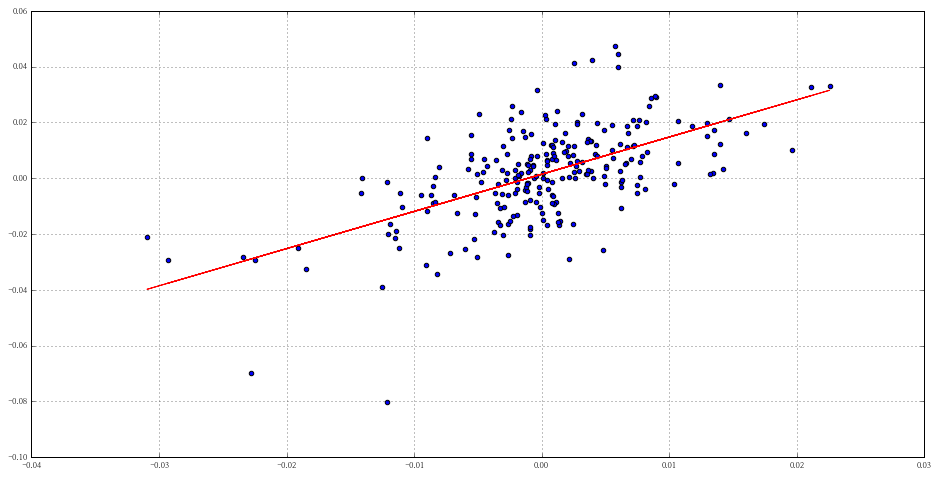

In [35]:
trend_x = rets['코스피'] 
trend_y = rets['코스피'] * beta +  alpha

plt.figure(figsize=(16,8))
plt.scatter(rets['코스피'], rets['삼성전자'])
plt.plot(trend_x,trend_y, 'r-')
plt.grid()
plt.show()

In [36]:
def market_beta(market_returns, stock_returns):
    beta = market_returns.cov(stock_returns) / market_returns.var()
    return beta

print ('삼성전자 시장 베타 = %.6f' % market_beta(rets['코스피'], rets['삼성전자']))
print ('LG화학 시장 베타 = %.6f' % market_beta(rets['코스피'], rets['LG화학']))
print ('KB금융 시장 베타 = %.6f' % market_beta(rets['코스피'], rets['KB금융']))

삼성전자 시장 베타 = 1.333073
LG화학 시장 베타 = 1.469014
KB금융 시장 베타 = 1.009715


# 리뷰
* 상관분석: 공분산, 상관계수, 베타
* 선형회귀 분석
* 종목 베타 (시장과 종목의 비교)

----
#### 2017 FinanceData http://fb.com/financedata http://financedata.github.com